# Fingertips Python API

[Fingertips Public Health Profiles](https://fingertips.phe.org.uk/profiles)

[Fingertips Python API package (fingertips_py) documentation](https://fingertips-py.readthedocs.io/en/latest/)

### Installation

For more information, see the fingertips_py documentation

#### pip

To install using pip, activate your environmenment and enter the following in the terminal:

```
python -m pip install fingertips_py
```

#### uv

To install using uv, activate your environment and enter the following in the terminal:

```
uv add fingertips_py
```

In [1]:
import fingertips_py as ftp

import pandas as pd

### Get profile IDs by profile name

In [2]:
cancer_profile_md = ftp.metadata.get_profile_by_name('cancer services') # creates a dictionary of metadata. Profile names are not case sensitive.

cancer_profile_id = cancer_profile_md['Id'] # access the profile ID in the metadata dictionary

cancer_profile_id

92

In [3]:
wdoh_profile_md = ftp.metadata.get_profile_by_name('wider determinants of health')

wdoh_profile_id = wdoh_profile_md['Id']

wdoh_profile_id

130

### Get profile metadata as a dataframe

In [4]:
wdoh_md_df = ftp.metadata.get_metadata_for_profile_as_dataframe(wdoh_profile_id)

wdoh_md_df.head()

,Indicator ID,Indicator,Indicator number,Rationale,Specific rationale,Definition,Data source,Indicator source,Definition of numerator,Source of numerator,...,Data re-use,Links,Indicator Content,Simple Name,Simple Definition,Unit,Value type,Year type,Polarity,Date updated
0,11401,The rate of complaints about noise,B14a,The Government's policy on noise is set out in...,NaN,Number of complaints per year per local author...,"OHID, in collaboration with Chartered Institut...",Data on noise complaints provided by Chartered...,Number of complaints about noise.,Chartered Institute of Environmental Health (C...,...,NaN,http://www.cieh.org/,NaN,NaN,NaN,"per 1,000",Crude rate,Financial,RAG - Low is good,17/01/2023
1,93754,Killed and seriously injured (KSI) casualties ...,B10,Motor vehicle traffic accidents are a major ca...,NaN,Number of people reported killed or seriously ...,"OHID, based on Department for Transport data",https://www.gov.uk/government/collections/road...,The number of people of all ages killed or ser...,"Department for Transport (DfT), Road accidents...",...,KSI are National Statistics and there are no r...,"<span style=""color: #0b0c0c; font-family: GDS ...",NaN,People killed or seriously injured on roads,Rate of people reported killed or seriously in...,per billion vehicle miles,Crude rate,Calendar,RAG - Low is good,21/10/2024
2,92772,Number of premises licensed to sell alcohol pe...,18.01,Local authorities have a demand for better loc...,NaN,Number of premises licences and club premises ...,"OHID, based on Home Office and Office for Nati...",NaN,Number of premises licences and club premises ...,"Home Office (HO), Alcohol and late night refre...",...,NaN,NaN,NaN,NaN,NaN,NaN,Crude rate,Financial,RAG - Low is good,11/07/2023
3,90357,The percentage of the population exposed to ro...,B14b,There are a number of direct and indirect link...,NaN,Noise exposure determined by strategic noise m...,"OHID, based on Department for Environment, Foo...",NaN,Noise exposure determined by strategic noise m...,"Department for Environment, Food and Rural Aff...",...,NaN,NaN,NaN,NaN,NaN,%,Proportion,Calendar,RAG - Low is good,05/04/2019
4,92937,Density of fast food outlets,NaN,The indicator is designed to help users unders...,NaN,"Crude rate per 100,000 population: the number ...",PointX and Office for National Statistics,NaN,"The numerator is a count, at a specific point ...",PointX,...,NaN,Ward level data for this indicator is availabl...,NaN,NaN,NaN,"per 100,000",Crude rate,Calendar,RAG - Low is good,08/03/2019


### Get metadata by indicator ID

In [5]:
fast_food_md = ftp.get_metadata_for_indicator_as_dataframe(92937)

fast_food_md

,Indicator ID,Indicator,Indicator number,Rationale,Specific rationale,Definition,Data source,Indicator source,Definition of numerator,Source of numerator,...,Data re-use,Links,Indicator Content,Simple Name,Simple Definition,Unit,Value type,Year type,Polarity,Date updated
0,92937,Density of fast food outlets,NaN,The indicator is designed to help users unders...,NaN,"Crude rate per 100,000 population: the number ...",PointX and Office for National Statistics,NaN,"The numerator is a count, at a specific point ...",PointX,...,NaN,Ward level data for this indicator is availabl...,NaN,NaN,NaN,"per 100,000",Crude rate,Calendar,RAG - Low is good,08/03/2019


### Get all area types

In [6]:
all_areas_dict = ftp.metadata.get_all_areas() # returns a nested dictionary, where the area ID is the key to a further dictionary of key:value pairs

all_areas_df = pd.DataFrame.from_dict(all_areas_dict, orient='index') # converts the nested dictionary to a DataFrame, where the outer key becomes the index

all_areas_df = all_areas_df.reset_index() # reset the DataFrame to have the default indexing

all_areas_df.rename(columns={'index':'Id'}, inplace=True) # rename the column labelled 'index' in the dictionary-to-DataFrame conversion

all_areas_df

,Id,Name,Short,Class,Sequence,CanBeDisplayedOnMap
0,3,Middle Super Output Area,MSOA,None,0,True
1,4,Lower Super Output Area,LSOA,None,0,False
2,6,Government Office Region (E12),Regions (statistical),None,0,True
3,7,General Practice,GPs,gp,0,True
4,8,Electoral Best Fit Wards,Electoral Wards,None,0,True
...,...,...,...,...,...,...
78,302,Upper tier local authorities (4/20-3/21),Counties & UAs (2020/21),ua-county-composite,2020,True
79,401,Lower tier local authorities (4/21-3/23),Districts & UAs (2021/22-2022/23),ua-la-composite,2021,True
80,402,Upper tier local authorities (4/21-3/23),Counties & UAs (2021/22-2022/23),ua-county-composite,2021,True
81,501,Lower tier local authorities (post 4/23),Districts & UAs (from Apr 2023),ua-la-composite,2023,True


### Get all area types available for a particular profile

In [7]:
wdoh_areas = ftp.metadata.get_area_types_for_profile(wdoh_profile_id)

wdoh_areas_df = pd.DataFrame.from_dict(wdoh_areas, orient='index')

wdoh_areas_df.reset_index(inplace=True)

wdoh_areas_df.drop('index', axis=1,inplace=True) # drop the column called 'index' following the dictionary-to-DataFrame conversion

wdoh_areas_df


,Id,Name,Short,Class,Sequence,CanBeDisplayedOnMap
0,6,Government Office Region (E12),Regions (statistical),None,0,True
1,15,England,England,None,0,False
2,301,Lower tier local authorities (4/20-3/21),Districts & UAs (2020/21),ua-la-composite,2020,True
3,302,Upper tier local authorities (4/20-3/21),Counties & UAs (2020/21),ua-county-composite,2020,True
4,501,Lower tier local authorities (post 4/23),Districts & UAs (from Apr 2023),ua-la-composite,2023,True
5,502,Upper tier local authorities (post 4/23),Counties & UAs (from Apr 2023),ua-county-composite,2023,True


### Get all data for indicators

There seems to be an error within this function at time of writing since it constructs  an invalid URL

```
ftp.retrieve_data.get_all_data_for_indicators
```

In [8]:
'''
wdoh_indicators_df = pd.DataFrame(
    ftp.retrieve_data.get_all_data_for_indicators(
        [11404,                                     # two Wider Determinants of Health indicators
         92772
         ],
         502,                                       # Area type = Upper tier local authorities
         15,                                        # Parent area type =  England
         filter_by_area_codes= None,
         is_test= False
    )
)

wdoh_indicators_df.head()
'''

'\nwdoh_indicators_df = pd.DataFrame(\n    ftp.retrieve_data.get_all_data_for_indicators(\n        [11404,                                     # two Wider Determinants of Health indicators\n         92772\n         ],\n         502,                                       # Area type = Upper tier local authorities\n         15,                                        # Parent area type =  England\n         filter_by_area_codes= None,\n         is_test= False\n    )\n)\n\nwdoh_indicators_df.head()\n'

### Let's try this one

```
fingertips_py.retrieve_data.get_data_by_indicator_ids
```


In [9]:
wdoh_indicators_df = pd.DataFrame(
    ftp.retrieve_data.get_data_by_indicator_ids(
        [11404,                                     # two Wider Determinants of Health indicators
         92772
         ],
         502,                                       # Area type = Upper tier local authorities
         15,                                        # Parent area type =  England
         include_sortable_time_periods=None,
         is_test= False
    )
)

wdoh_indicators_df.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal,Time period range
0,92772,Number of premises licensed to sell alcohol pe...,NaN,NaN,E92000001,England,England,Not applicable,Not applicable,NaN,...,154487.0,130310.0136,Aggregated from all known lower geography values,NaN,Not compared,Not compared,20150000,NaN,NaN,1y
1,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E92000001,England,England,Not applicable,Not applicable,NaN,...,154487.0,130310.0136,Aggregated from all known lower geography values,NaN,Similar,Not compared,20150000,NaN,NaN,1y
2,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000001,Hartlepool,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,312.0,93.5595,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y
3,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000002,Middlesbrough,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,347.0,53.8888,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y
4,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000003,Redcar and Cleveland,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,361.0,244.8202,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y


### Get data at all available geographies for a particular indicator

In [10]:
licensed_premises_all_geographies = ftp.retrieve_data.get_data_for_indicator_at_all_available_geographies(92772)

licensed_premises_all_geographies.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal,Time period range
0,92772,Number of premises licensed to sell alcohol pe...,NaN,NaN,E92000001,England,England,Not applicable,Not applicable,NaN,...,154487.0,130310.0136,Aggregated from all known lower geography values,NaN,Not compared,Not compared,20150000,NaN,NaN,1y
1,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E92000001,England,England,Not applicable,Not applicable,NaN,...,154487.0,130310.0136,Aggregated from all known lower geography values,NaN,Similar,Not compared,20150000,NaN,NaN,1y
2,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000001,Hartlepool,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,312.0,93.5595,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y
3,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000002,Middlesbrough,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,347.0,53.8888,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y
4,92772,Number of premises licensed to sell alcohol pe...,E92000001,England,E06000003,Redcar and Cleveland,Counties & UAs (from Apr 2023),Not applicable,Not applicable,NaN,...,361.0,244.8202,NaN,NaN,Worse,Not compared,20150000,NaN,NaN,1y


In [11]:
# Let's check whether it has included all geographies by getting a list of unique area types

set(licensed_premises_all_geographies['Area Type'])

{'Counties & UAs (2020/21)',
 'Counties & UAs (2021/22-2022/23)',
 'Counties & UAs (from Apr 2023)',
 'Districts & UAs (2020/21)',
 'Districts & UAs (2021/22-2022/23)',
 'Districts & UAs (from Apr 2023)',
 'England',
 'Regions (statistical)'}

### Let's put all this together and visualise it on a map

We will need to import some more packages

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

Let's plot "Child Poverty, Income deprivation affecting children index (IDACI) 2019 Proportion %" in Bracknell Forest Local Authority area by MSOA

Firstly, we need the profile ID for the Profile "Local health, public health data for small geographic areas"

In [13]:
small_geographic_areas_md = ftp.metadata.get_profile_by_name('Local health, public health data for small geographic areas')

small_geographic_areas_id = small_geographic_areas_md['Id'] # access the profile ID in the metadata dictionary

Get the profile metadata as a dataframe

In [14]:
small_geographic_areas_md_df = ftp.metadata.get_metadata_for_profile_as_dataframe(small_geographic_areas_id)

small_geographic_areas_md_df.head()

,Indicator ID,Indicator,Indicator number,Rationale,Specific rationale,Definition,Data source,Indicator source,Definition of numerator,Source of numerator,...,Data re-use,Links,Indicator Content,Simple Name,Simple Definition,Unit,Value type,Year type,Polarity,Date updated
0,93744,Percentage of the total resident population wh...,NaN,The indicator shows the proportion of the popu...,NaN,Population aged under 5 as a percentage of tot...,Office for National Statistics,"Office for National Statistics (ONS), Mid year...",Resident population aged under 5,"Office for National Statistics (ONS), Mid-year...",...,Under the terms of the Open Government Licence...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,Not applicable,05/07/2022
1,93084,Percentage of the total resident population wh...,93084.0,The indicator shows the proportion of the popu...,NaN,Population aged under 16 as a percentage of to...,Office for National Statistics,"Office for National Statistics (ONS), Mid year...",Resident population aged under 16 years old,"Office for National Statistics (ONS), Mid-year...",...,ONS Crown Copyright\r\nUnder the terms of the ...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,Not applicable,05/07/2022
2,93745,Percentage of the total resident population wh...,NaN,This indicator shows the proportion of the pop...,NaN,Population aged 5 to 15 as a percentage of tot...,Office for National Statistics,"Office for National Statistics (ONS), Mid year...",Total number of residents aged 5 to 15 years,"Office for National Statistics (ONS), Mid-year...",...,Under the terms of the Open Government Licence...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,Not applicable,05/07/2022
3,93083,Percentage of the total resident population wh...,93083.0,This indicator shows the proportion of the pop...,NaN,Population aged 16 to 24 as a percentage of to...,Office for National Statistics,"Office for National Statistics (ONS), Mid year...",Total number of residents aged 16 to 24 years,"Office for National Statistics (ONS), Mid-year...",...,Under the terms of the Open Government Licence...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,Not applicable,05/07/2022
4,93082,Percentage of the total resident population wh...,93082.0,This indicator shows the proportion of the pop...,NaN,Population aged 25 to 64 as a percentage of to...,Office for National Statistics,"Office for National Statistics (ONS), Mid year...",Total number of residents aged 25 to 64 years,"Office for National Statistics (ONS), Mid-year...",...,Under the terms of the Open Government Licence...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,Not applicable,05/07/2022


In [15]:
idaci = small_geographic_areas_md_df[small_geographic_areas_md_df['Indicator'].str.contains('IDACI')]

idaci

,Indicator ID,Indicator,Indicator number,Rationale,Specific rationale,Definition,Data source,Indicator source,Definition of numerator,Source of numerator,...,Data re-use,Links,Indicator Content,Simple Name,Simple Definition,Unit,Value type,Year type,Polarity,Date updated
14,93094,"Child Poverty, Income deprivation affecting ch...",93094.0,This indicator is a measure of children living...,NaN,The Income Deprivation Affecting Children Inde...,"Ministry of Housing, Communities and Local Gov...","Ministry of Housing, Communities and Local Gov...",Number of children aged 0 to 15 living in inco...,"Ministry of Housing, Communities and Local Gov...",...,You may reuse this information (not including ...,The data for this indicator is also available ...,NaN,NaN,NaN,%,Proportion,Calendar,RAG - Low is good,05/07/2022


In [16]:
idaci_id = idaci['Indicator ID'].iloc[0] # gets the entry from the Indicator ID column

In [17]:
idaci_df = pd.DataFrame(
    ftp.retrieve_data.get_data_by_indicator_ids(
        idaci_id,
        3, # MSOA
        501 # Local Authority
    )
)

idaci_df

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to Districts & UAs (from Apr 2023) value or percentiles,Time period Sortable,New data,Compared to goal,Time period range
0,93094,"Child Poverty, Income deprivation affecting ch...",NaN,NaN,E92000001,England,England,Persons,<16 yrs,NaN,...,1777641.757,10405050,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN,1y
1,93094,"Child Poverty, Income deprivation affecting ch...",E92000001,England,E06000001,Hartlepool,Districts & UAs (from Apr 2023),Persons,<16 yrs,NaN,...,4978.719,17580,NaN,Cannot be calculated,Worse,Not compared,20190000,NaN,NaN,1y
2,93094,"Child Poverty, Income deprivation affecting ch...",E92000001,England,E06000002,Middlesbrough,Districts & UAs (from Apr 2023),Persons,<16 yrs,NaN,...,9359.504,28622,NaN,Cannot be calculated,Worse,Not compared,20190000,NaN,NaN,1y
3,93094,"Child Poverty, Income deprivation affecting ch...",E92000001,England,E06000003,Redcar and Cleveland,Districts & UAs (from Apr 2023),Persons,<16 yrs,NaN,...,6195.212,24210,NaN,Cannot be calculated,Worse,Not compared,20190000,NaN,NaN,1y
4,93094,"Child Poverty, Income deprivation affecting ch...",E92000001,England,E06000004,Stockton-on-Tees,Districts & UAs (from Apr 2023),Persons,<16 yrs,NaN,...,7965.449,38168,NaN,Cannot be calculated,Worse,Not compared,20190000,NaN,NaN,1y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,93094,"Child Poverty, Income deprivation affecting ch...",E09000011,Greenwich,E02006930,Greenwich East,MSOA,Persons,<16 yrs,NaN,...,240.695,1387,NaN,Cannot be calculated,Similar,Better,20190000,NaN,NaN,1y
7082,93094,"Child Poverty, Income deprivation affecting ch...",E09000011,Greenwich,E02006931,Greenwich Town & Park,MSOA,Persons,<16 yrs,NaN,...,306.477,1701,NaN,Cannot be calculated,Similar,Better,20190000,NaN,NaN,1y
7083,93094,"Child Poverty, Income deprivation affecting ch...",E08000012,Liverpool,E02006932,Central & Islington,MSOA,Persons,<16 yrs,NaN,...,84.930,279,NaN,Cannot be calculated,Worse,Similar,20190000,NaN,NaN,1y
7084,93094,"Child Poverty, Income deprivation affecting ch...",E08000012,Liverpool,E02006933,Albert Dock & Queen's Dock,MSOA,Persons,<16 yrs,NaN,...,180.603,532,NaN,Cannot be calculated,Worse,Worse,20190000,NaN,NaN,1y


Now we can start importing the data for the geographic mapping. For this we will use a .geojson boundary shape file (downloaded from the Open Geography Portal)

In [18]:
gdf = gpd.read_file('data/MSOA_Dec_2011_Boundaries_Super_Generalised_Clipped_BSC_EW_V3_2022_-5254045062471510471.geojson')

gdf.head()

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E02000001,City of London 001,City of London 001,532378,181354,-0.093570,51.51560,a9f03568-7a0a-42b8-a23e-1271f76431e1,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189693,0.138759,51.58659,f0ca54f0-1a1e-4c72-8fcb-85e21be6de79,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188522,0.138150,51.57607,3772a2ec-b052-4000-b62b-2c85ac401a7f,"POLYGON ((0.14841 51.58075, 0.14978 51.5697, 0..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186418,0.176830,51.55644,3388e1f6-e578-4907-b271-168756f05856,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186827,0.144269,51.56071,1af0aed4-60d0-4fd6-b326-4b868968c12f,"POLYGON ((0.15441 51.56607, 0.1479 51.56109, 0..."


Now we join this to the Fingertips data

In [19]:
boundary_df = pd.merge(
    left= gdf,
    right= idaci_df,
    left_on= 'MSOA11CD',
    right_on= 'Area Code',
    how= 'right' 
)

boundary_df = boundary_df[boundary_df['Parent Name'] == 'Bracknell Forest'] # just get data where the parent area (i.e. local authority) is Bracknell Forest

boundary_df.head()

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to Districts & UAs (from Apr 2023) value or percentiles,Time period Sortable,New data,Compared to goal,Time period range
3557,3263.0,E02003352,Bracknell Forest 001,Bracknell Forest 001,491853.0,172163.0,-0.67980,51.44102,3c549766-9728-4db5-b739-7c766b7413c1,"POLYGON ((-0.65676 51.46149, -0.65822 51.44932...",...,34.968,1018,NaN,Cannot be calculated,Better,Better,20190000,NaN,NaN,1y
3558,3264.0,E02003353,Bracknell Forest 002,Bracknell Forest 002,486081.0,171506.0,-0.76298,51.43602,ae2b8239-e38a-4f1c-90fe-f290fbc538e8,"POLYGON ((-0.75275 51.46223, -0.74107 51.45887...",...,64.414,1752,NaN,Cannot be calculated,Better,Better,20190000,NaN,NaN,1y
3559,3265.0,E02003354,Bracknell Forest 003,Bracknell Forest 003,487683.0,170212.0,-0.74026,51.42414,31f3071a-3138-4059-b9cd-279441b78d10,"POLYGON ((-0.72071 51.41979, -0.72078 51.41927...",...,117.612,2124,NaN,Cannot be calculated,Better,Better,20190000,NaN,NaN,1y
3560,3266.0,E02003355,Bracknell Forest 004,Bracknell Forest 004,486030.0,169758.0,-0.76414,51.42031,74e3802a-22fa-476d-9574-9987b0adabb0,"POLYGON ((-0.75417 51.41869, -0.76013 51.41353...",...,234.014,1515,NaN,Cannot be calculated,Similar,Worse,20190000,NaN,NaN,1y
3561,3267.0,E02003356,Bracknell Forest 005,Bracknell Forest 005,490476.0,167562.0,-0.70078,51.39988,3905ed89-433e-4322-8e30-e7c16404ebe1,"POLYGON ((-0.68535 51.40142, -0.66763 51.38457...",...,46.210,1470,NaN,Cannot be calculated,Better,Better,20190000,NaN,NaN,1y


Plot the data onto OpenStreetMap via the *contextily* package.

*matplotlib.pyplot* plots the shapes coloured by percentage using the polygon geometry data from the geopandas dataframe.

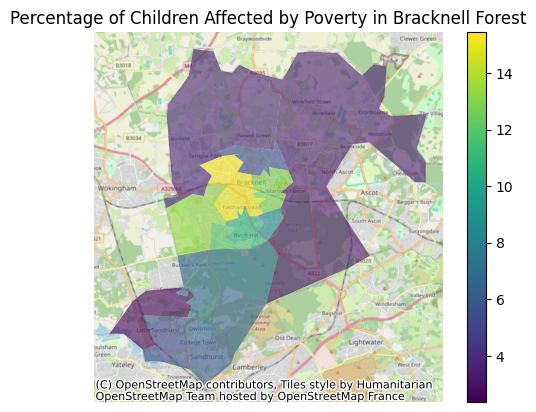

In [20]:
ax = boundary_df.plot(column= 'Value', legend=True, alpha = 0.6)

ax.axis('off')
ax.set_title('Percentage of Children Affected by Poverty in Bracknell Forest')

cx.add_basemap(
    ax,
    crs=boundary_df.crs.to_string()
)